<a href="https://colab.research.google.com/github/raphasariedine/utfpr/blob/main/Monitoria_Sitio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sítio**

In [6]:
#importar o pandas
import pandas as pd

In [7]:
#criar o data frame com o read_excel
df = pd.read_excel("/content/sitio modificado.xlsx")
display(df)

,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO
0,2021,Natal,12,Soja,540,1236,158.70
1,2021,Natal,12,Milho,649,3120,88.20
2,2021,Pica-pau,36,Soja,563,4032,159.00
3,2021,Pica-pau,36,Milho,657,8280,86.80
4,2021,Sede,20,Soja,520,2160,160.20
5,2021,Sede,20,Milho,630,4900,86.80
6,2022,Natal,12,Soja,590,1464,191.80
7,2022,Natal,12,Milho,774,2796,81.50
8,2022,Pica-pau,36,Soja,588,4320,193.40
9,2022,Pica-pau,36,Milho,732,9072,80.10


In [8]:
#Mostrar sítios só por fazenda totais
fazenda = df.groupby('FAZENDA').sum() # groupby: agrupar por uma classe desejada.
fazenda

,ANO,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO
FAZENDA,,,,,,
Natal,16180,96,SojaMilhoSojaMilhoSojaMilhoSojaMilho,5436,16260,875.23
Pica-pau,16180,288,SojaMilhoSojaMilhoSojaMilhoSojaMilho,5416,49032,879.53
Sede,16180,160,SojaMilhoSojaMilhoSojaMilhoSojaMilho,5312,27280,881.63


In [9]:
#Mostrar sítio por culturas
fazenda_cultura = df.groupby(['FAZENDA', 'CULTURA']).sum()
fazenda_cultura

ANO  ALQUEIRE  PLUVIOMETRIA  SACAS   PREÇO
FAZENDA  CULTURA                                             
Natal    Milho    8090        48          2944  11184  276.60
         Soja     8090        48          2492   5076  598.63
Pica-pau Milho    8090       144          2897  33588  279.50
         Soja     8090       144          2519  15444  600.03
Sede     Milho    8090        80          2918  18100  278.40
         Soja     8090        80          2394   9180  603.23

In [10]:
#Corrigindo o somatório
fazenda_culturas = df.groupby(['FAZENDA', 'CULTURA'])[['PLUVIOMETRIA', 'SACAS', 'PREÇO']].sum()
fazenda_culturas

PLUVIOMETRIA  SACAS   PREÇO
FAZENDA  CULTURA                             
Natal    Milho            2944  11184  276.60
         Soja             2492   5076  598.63
Pica-pau Milho            2897  33588  279.50
         Soja             2519  15444  600.03
Sede     Milho            2918  18100  278.40
         Soja             2394   9180  603.23

In [11]:
#Mostrar por Ano quanto cada fazenda produziu
fazenda_ano = df.groupby(['ANO', 'FAZENDA', 'CULTURA'])[['PLUVIOMETRIA', 'SACAS', 'PREÇO']].sum()
fazenda_ano

PLUVIOMETRIA  SACAS   PREÇO
ANO  FAZENDA  CULTURA                             
2021 Natal    Milho             649   3120   88.20
              Soja              540   1236  158.70
     Pica-pau Milho             657   8280   86.80
              Soja              563   4032  159.00
     Sede     Milho             630   4900   86.80
              Soja              520   2160  160.20
2022 Natal    Milho             774   2796   81.50
              Soja              590   1464  191.80
     Pica-pau Milho             732   9072   80.10
              Soja              588   4320  193.40
     Sede     Milho             761   4680   80.50
              Soja              579   2720  195.10
2023 Natal    Milho             780   2688   52.40
              Soja              689   1200  135.00
     Pica-pau Milho             755   9036   56.30
              Soja              675   3924  134.50
     Sede     Milho             781   4460   54.80
              Soja              611   2280  134.80
2024 Natal    Milho             741   2580   54.50
              Soja              673   1176  113.13
     Pica-pau Milho             753   7200   56.30
              Soja              693   3168  113.13
     Sede     Milho             746   4060   56.30
              Soja              684   2020  113.13

In [12]:
#Mostrar por cultura
cultura = df.groupby('CULTURA')[['SACAS', 'PREÇO']].sum()
cultura

,SACAS,PREÇO
CULTURA,,
Milho,62872,834.50
Soja,29700,1801.89


In [13]:
#Filtrando chuvas
chuvas = df.groupby(['FAZENDA', 'ANO'])[['PLUVIOMETRIA']].sum()
chuvas

PLUVIOMETRIA
FAZENDA  ANO               
Natal    2021          1189
         2022          1364
         2023          1469
         2024          1414
Pica-pau 2021          1220
         2022          1320
         2023          1430
         2024          1446
Sede     2021          1150
         2022          1340
         2023          1392
         2024          1430

In [14]:
#Média de chuvas por mês
media_chuvas = df.groupby(['FAZENDA', 'ANO', 'CULTURA'])[['PLUVIOMETRIA']].sum() / 6
media_chuvas

PLUVIOMETRIA
FAZENDA  ANO  CULTURA              
Natal    2021 Milho      108.166667
              Soja        90.000000
         2022 Milho      129.000000
              Soja        98.333333
         2023 Milho      130.000000
              Soja       114.833333
         2024 Milho      123.500000
              Soja       112.166667
Pica-pau 2021 Milho      109.500000
              Soja        93.833333
         2022 Milho      122.000000
              Soja        98.000000
         2023 Milho      125.833333
              Soja       112.500000
         2024 Milho      125.500000
              Soja       115.500000
Sede     2021 Milho      105.000000
              Soja        86.666667
         2022 Milho      126.833333
              Soja        96.500000
         2023 Milho      130.166667
              Soja       101.833333
         2024 Milho      124.333333
              Soja       114.000000

In [15]:
#Quanto de milho
milho = df[df['CULTURA'] == 'Milho']
agrupar_milho = milho.groupby(['ANO', 'FAZENDA', 'CULTURA'])[['SACAS']].sum()
agrupar_milho

SACAS
ANO  FAZENDA  CULTURA       
2021 Natal    Milho     3120
     Pica-pau Milho     8280
     Sede     Milho     4900
2022 Natal    Milho     2796
     Pica-pau Milho     9072
     Sede     Milho     4680
2023 Natal    Milho     2688
     Pica-pau Milho     9036
     Sede     Milho     4460
2024 Natal    Milho     2580
     Pica-pau Milho     7200
     Sede     Milho     4060

In [16]:
#Adicionando nova coluna sacas/alqueire sc
df_novo = df
df_novo['SC'] = df_novo['SACAS'] // df_novo['ALQUEIRE']
df_novo

,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO,SC
0,2021,Natal,12,Soja,540,1236,158.70,103
1,2021,Natal,12,Milho,649,3120,88.20,260
2,2021,Pica-pau,36,Soja,563,4032,159.00,112
3,2021,Pica-pau,36,Milho,657,8280,86.80,230
4,2021,Sede,20,Soja,520,2160,160.20,108
5,2021,Sede,20,Milho,630,4900,86.80,245
6,2022,Natal,12,Soja,590,1464,191.80,122
7,2022,Natal,12,Milho,774,2796,81.50,233
8,2022,Pica-pau,36,Soja,588,4320,193.40,120
9,2022,Pica-pau,36,Milho,732,9072,80.10,252


In [17]:
#Adicionando coluna valor bruto  VALOR BRUTO
df_atualizado = df_novo
df_atualizado['VALOR BRUTO'] = df_atualizado['SACAS'] * df_atualizado['PREÇO']
df_atualizado

,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO,SC,VALOR BRUTO
0,2021,Natal,12,Soja,540,1236,158.70,103,196153.20
1,2021,Natal,12,Milho,649,3120,88.20,260,275184.00
2,2021,Pica-pau,36,Soja,563,4032,159.00,112,641088.00
3,2021,Pica-pau,36,Milho,657,8280,86.80,230,718704.00
4,2021,Sede,20,Soja,520,2160,160.20,108,346032.00
5,2021,Sede,20,Milho,630,4900,86.80,245,425320.00
6,2022,Natal,12,Soja,590,1464,191.80,122,280795.20
7,2022,Natal,12,Milho,774,2796,81.50,233,227874.00
8,2022,Pica-pau,36,Soja,588,4320,193.40,120,835488.00
9,2022,Pica-pau,36,Milho,732,9072,80.10,252,726667.20


In [18]:
#Função para pesquisar por fazenda
def buscar_fazenda(dataframe, minha_fazenda):
  resultado = dataframe[dataframe['FAZENDA'] == minha_fazenda]
  if resultado.empty:
    return "A fazenda '"+ minha_fazenda + "' não foi encontrada!"
  return resultado

nome_da_fazenda = input()
df_fazenda = buscar_fazenda(df_atualizado, nome_da_fazenda)
df_fazenda

Natal


,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO,SC,VALOR BRUTO
0,2021,Natal,12,Soja,540,1236,158.70,103,196153.20
1,2021,Natal,12,Milho,649,3120,88.20,260,275184.00
6,2022,Natal,12,Soja,590,1464,191.80,122,280795.20
7,2022,Natal,12,Milho,774,2796,81.50,233,227874.00
12,2023,Natal,12,Soja,689,1200,135.00,100,162000.00
13,2023,Natal,12,Milho,780,2688,52.40,224,140851.20
18,2024,Natal,12,Soja,673,1176,113.13,98,133040.88
19,2024,Natal,12,Milho,741,2580,54.50,215,140610.00


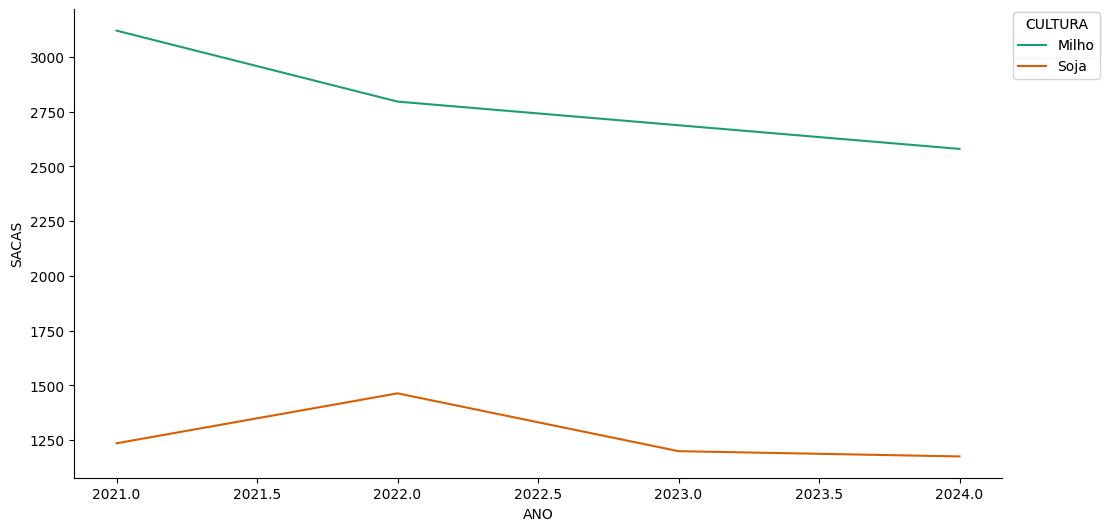

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ANO']
  ys = series['SACAS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_fazenda.sort_values('ANO', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CULTURA')):
  _plot_series(series, series_name, i)
  fig.legend(title='CULTURA', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ANO')
_ = plt.ylabel('SACAS')

In [ ]:
#Função para adicionar um novo valor no dataframe
def adicionar_valor(df, ano, fazenda, alqueire, cultura, pluv, sacas, preço):
  sc = sacas/alqueire
  val = sacas*preço
  df.loc[len(df)] = [ano, fazenda, alqueire, cultura, pluv, sacas, preço, sc, val]
  return  df

novo_df_ano = adicionar_valor(df_atualizado, 2025, 'Pedrinhas', 15, 'Cana', 250, 6000, 150.8)
novo_df_ano

,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO,SC,VALOR BRUTO
0,2021,Natal,12,Soja,540,1236,158.70,103.0,196153.20
1,2021,Natal,12,Milho,649,3120,88.20,260.0,275184.00
2,2021,Pica-pau,36,Soja,563,4032,159.00,112.0,641088.00
3,2021,Pica-pau,36,Milho,657,8280,86.80,230.0,718704.00
4,2021,Sede,20,Soja,520,2160,160.20,108.0,346032.00
5,2021,Sede,20,Milho,630,4900,86.80,245.0,425320.00
6,2022,Natal,12,Soja,590,1464,191.80,122.0,280795.20
7,2022,Natal,12,Milho,774,2796,81.50,233.0,227874.00
8,2022,Pica-pau,36,Soja,588,4320,193.40,120.0,835488.00
9,2022,Pica-pau,36,Milho,732,9072,80.10,252.0,726667.20


In [ ]:
#Deletar Serie ano e fazenda
def deletar_linha(df, ano, fazenda):
  df = df[~((df['ANO']== ano) & (df['FAZENDA']== fazenda))]
  return df

df_deletado = deletar_linha(novo_df_ano, int(input('Ano: ')), input('Fazenda: '))

Ano: 2025
Fazenda: Pedrinhas


In [ ]:
df_deletado

,ANO,FAZENDA,ALQUEIRE,CULTURA,PLUVIOMETRIA,SACAS,PREÇO,SC,VALOR BRUTO
0,2021,Natal,12,Soja,540,1236,158.70,103.0,196153.20
1,2021,Natal,12,Milho,649,3120,88.20,260.0,275184.00
2,2021,Pica-pau,36,Soja,563,4032,159.00,112.0,641088.00
3,2021,Pica-pau,36,Milho,657,8280,86.80,230.0,718704.00
4,2021,Sede,20,Soja,520,2160,160.20,108.0,346032.00
5,2021,Sede,20,Milho,630,4900,86.80,245.0,425320.00
6,2022,Natal,12,Soja,590,1464,191.80,122.0,280795.20
7,2022,Natal,12,Milho,774,2796,81.50,233.0,227874.00
8,2022,Pica-pau,36,Soja,588,4320,193.40,120.0,835488.00
9,2022,Pica-pau,36,Milho,732,9072,80.10,252.0,726667.20


In [ ]:
#Descrição
df_deletado.describe()

,ANO,ALQUEIRE,PLUVIOMETRIA,SACAS,PREÇO,SC,VALOR BRUTO
count,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2022.50000,22.666667,673.500000,3857.166667,109.849583,170.041667,373597.205000
std,1.14208,10.192353,81.043198,2370.055946,47.674178,64.098076,202732.496874
min,2021.00000,12.000000,520.000000,1176.000000,52.400000,88.000000,133040.880000
25%,2021.75000,12.000000,605.750000,2250.000000,74.150000,108.750000,228360.450000
50%,2022.50000,20.000000,679.500000,3144.000000,100.665000,168.000000,326688.000000
75%,2023.25000,36.000000,747.750000,4515.000000,140.925000,230.750000,513489.600000
max,2024.00000,36.000000,781.000000,9072.000000,195.100000,260.000000,835488.000000


from matplotlib import pyplot as plt
_df_0['ANO'].plot(kind='hist', bins=20, title='ANO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ALQUEIRE'].plot(kind='hist', bins=20, title='ALQUEIRE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PLUVIOMETRIA'].plot(kind='hist', bins=20, title='PLUVIOMETRIA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SACAS'].plot(kind='hist', bins=20, title='SACAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ANO', y='ALQUEIRE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ALQUEIRE', y='PLUVIOMETRIA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PLUVIOMETRIA', y='SACAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SACAS', y='PREÇO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ANO'].plot(kind='line', figsize=(8, 4), title='ANO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['ALQUEIRE'].plot(kind='line', figsize=(8, 4), title='ALQUEIRE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PLUVIOMETRIA'].plot(kind='line', figsize=(8, 4), title='PLUVIOMETRIA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['SACAS'].plot(kind='line', figsize=(8, 4), title='SACAS')
plt.gca().spines[['top', 'right']].set_visible(False)

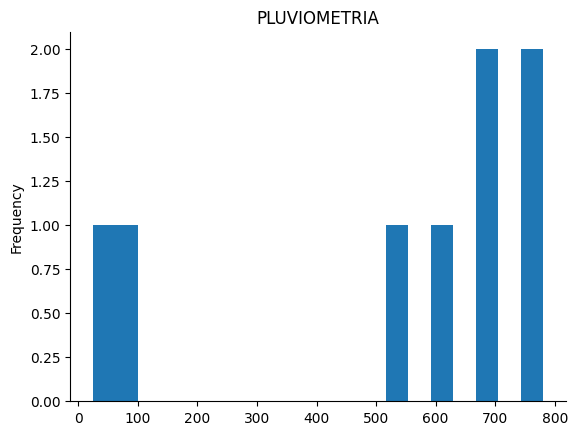

In [ ]:
from matplotlib import pyplot as plt
_df_2['PLUVIOMETRIA'].plot(kind='hist', bins=20, title='PLUVIOMETRIA')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Função para encontrar a fazenda com a maior produção de sacas em um determinado ano
